In [1]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools

# Sklearn all
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

# Load data
data = pd.read_csv("/Users/lluisarull/Desktop/DSDM/Machine_Learning/Assignment4/churn_data - churn_data.csv", sep=';')
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00


# Data Exploration

In [2]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [3]:
# Checking for missing values

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
Churn,0,0.00
AccountWeeks,0,0.00
ContractRenewal,0,0.00
DataPlan,0,0.00
DataUsage,0,0.00
CustServCalls,0,0.00
DayMins,0,0.00
DayCalls,0,0.00
MonthlyCharge,0,0.00
OverageFee,0,0.00


In [4]:
# Check variable types
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

We can see there is no null data neither categorical data in the dataset

# Chosing the Evaluation Metric

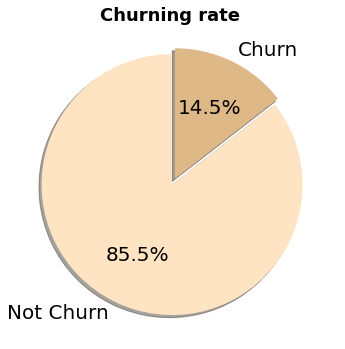

In [5]:
# Ploting and exploring the target 
labels = ['Not Churn', 'Churn']
sizes = data['Churn'].value_counts(sort = True)

colors = ["bisque","burlywood"]
explode = (0.05,0) 
 
plt.figure(figsize=(6,6))
plt.suptitle("Churning rate",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()

In [6]:
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In order to see which is the best evaluation metric to assess the quality of the model, we need to explore the target and see how the data is distributed. As we can see, most of the data (85.5%) is negative and we care about the positve class (which are the attributes that increase the customers' probability to churn). Therefore, since the class we want to predict correctly is missrepresented and there is a downside on predicting False Negatives, F1 score would be better than accuracy. In this specific case, since we are in an unbalanced situation, using accuracy wouldn't be appropriate because by simply classifiying all observations as the majority class (Churing) we would get a high score.


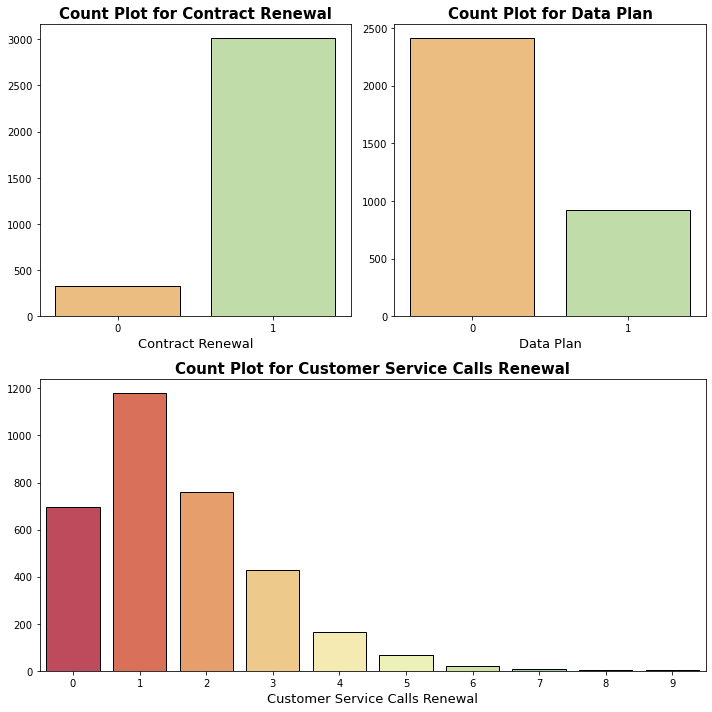

In [7]:
# Ploting other attributes
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = data , x = "ContractRenewal" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Contract Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = data , x = "DataPlan" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Data Plan" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = data , x = "CustServCalls" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Customer Service Calls Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Customer Service Calls Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.tight_layout()
plt.show()

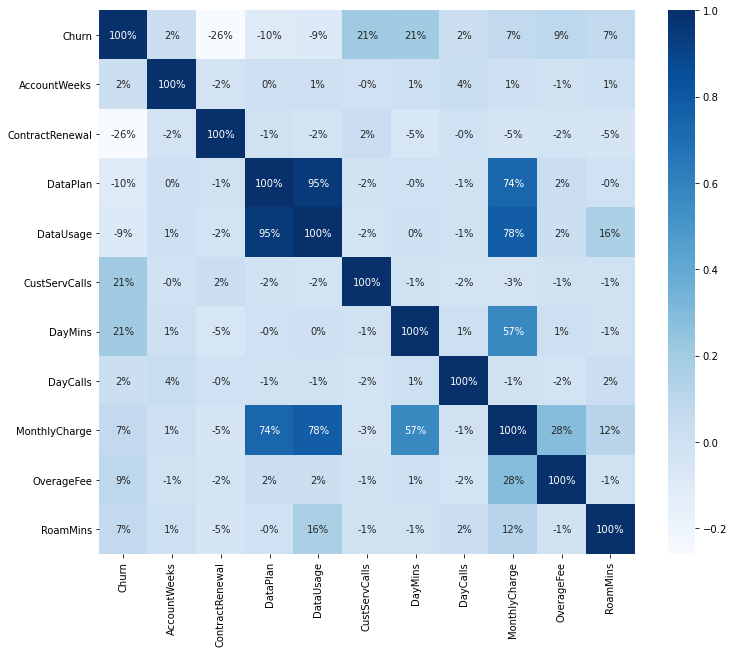

In [8]:
# Correlation map
ax = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In the previous correlation map we are able to see that the probability of churning is negatively correlated with DataUsage and positively correlated with all the other attributes (we are not considering Contract Renewal and Data Plan as they are dummy variables). We have analyzed their impact on churning hereafter.

We are also able to check that DataPlan and DataUsage are highly correlated attributes, and they are also correlated with MonthlyCharge.

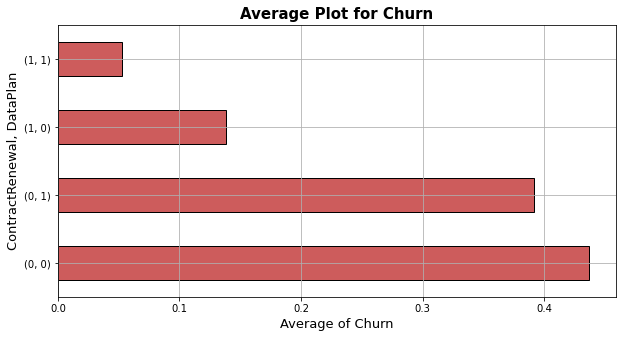

In [9]:
# Contract Renewal and Data Plan impact on Churning Probability
ax = plt.figure(figsize=(10,5))
data.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="indianred",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=15, fontweight='bold', fontfamily='sans')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='sans')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='sans')
plt.grid(True)
plt.show()

Contract Renewal and Data Plan are two important attributes when trying to predict customer churn. If a customer has recently renewed a contract and has a data plan, the probability of churning is much more lower than if he/she has not. Moreover, we can also see that having renewed a contract recently has a higher impact on the churning rate than having a data plan.

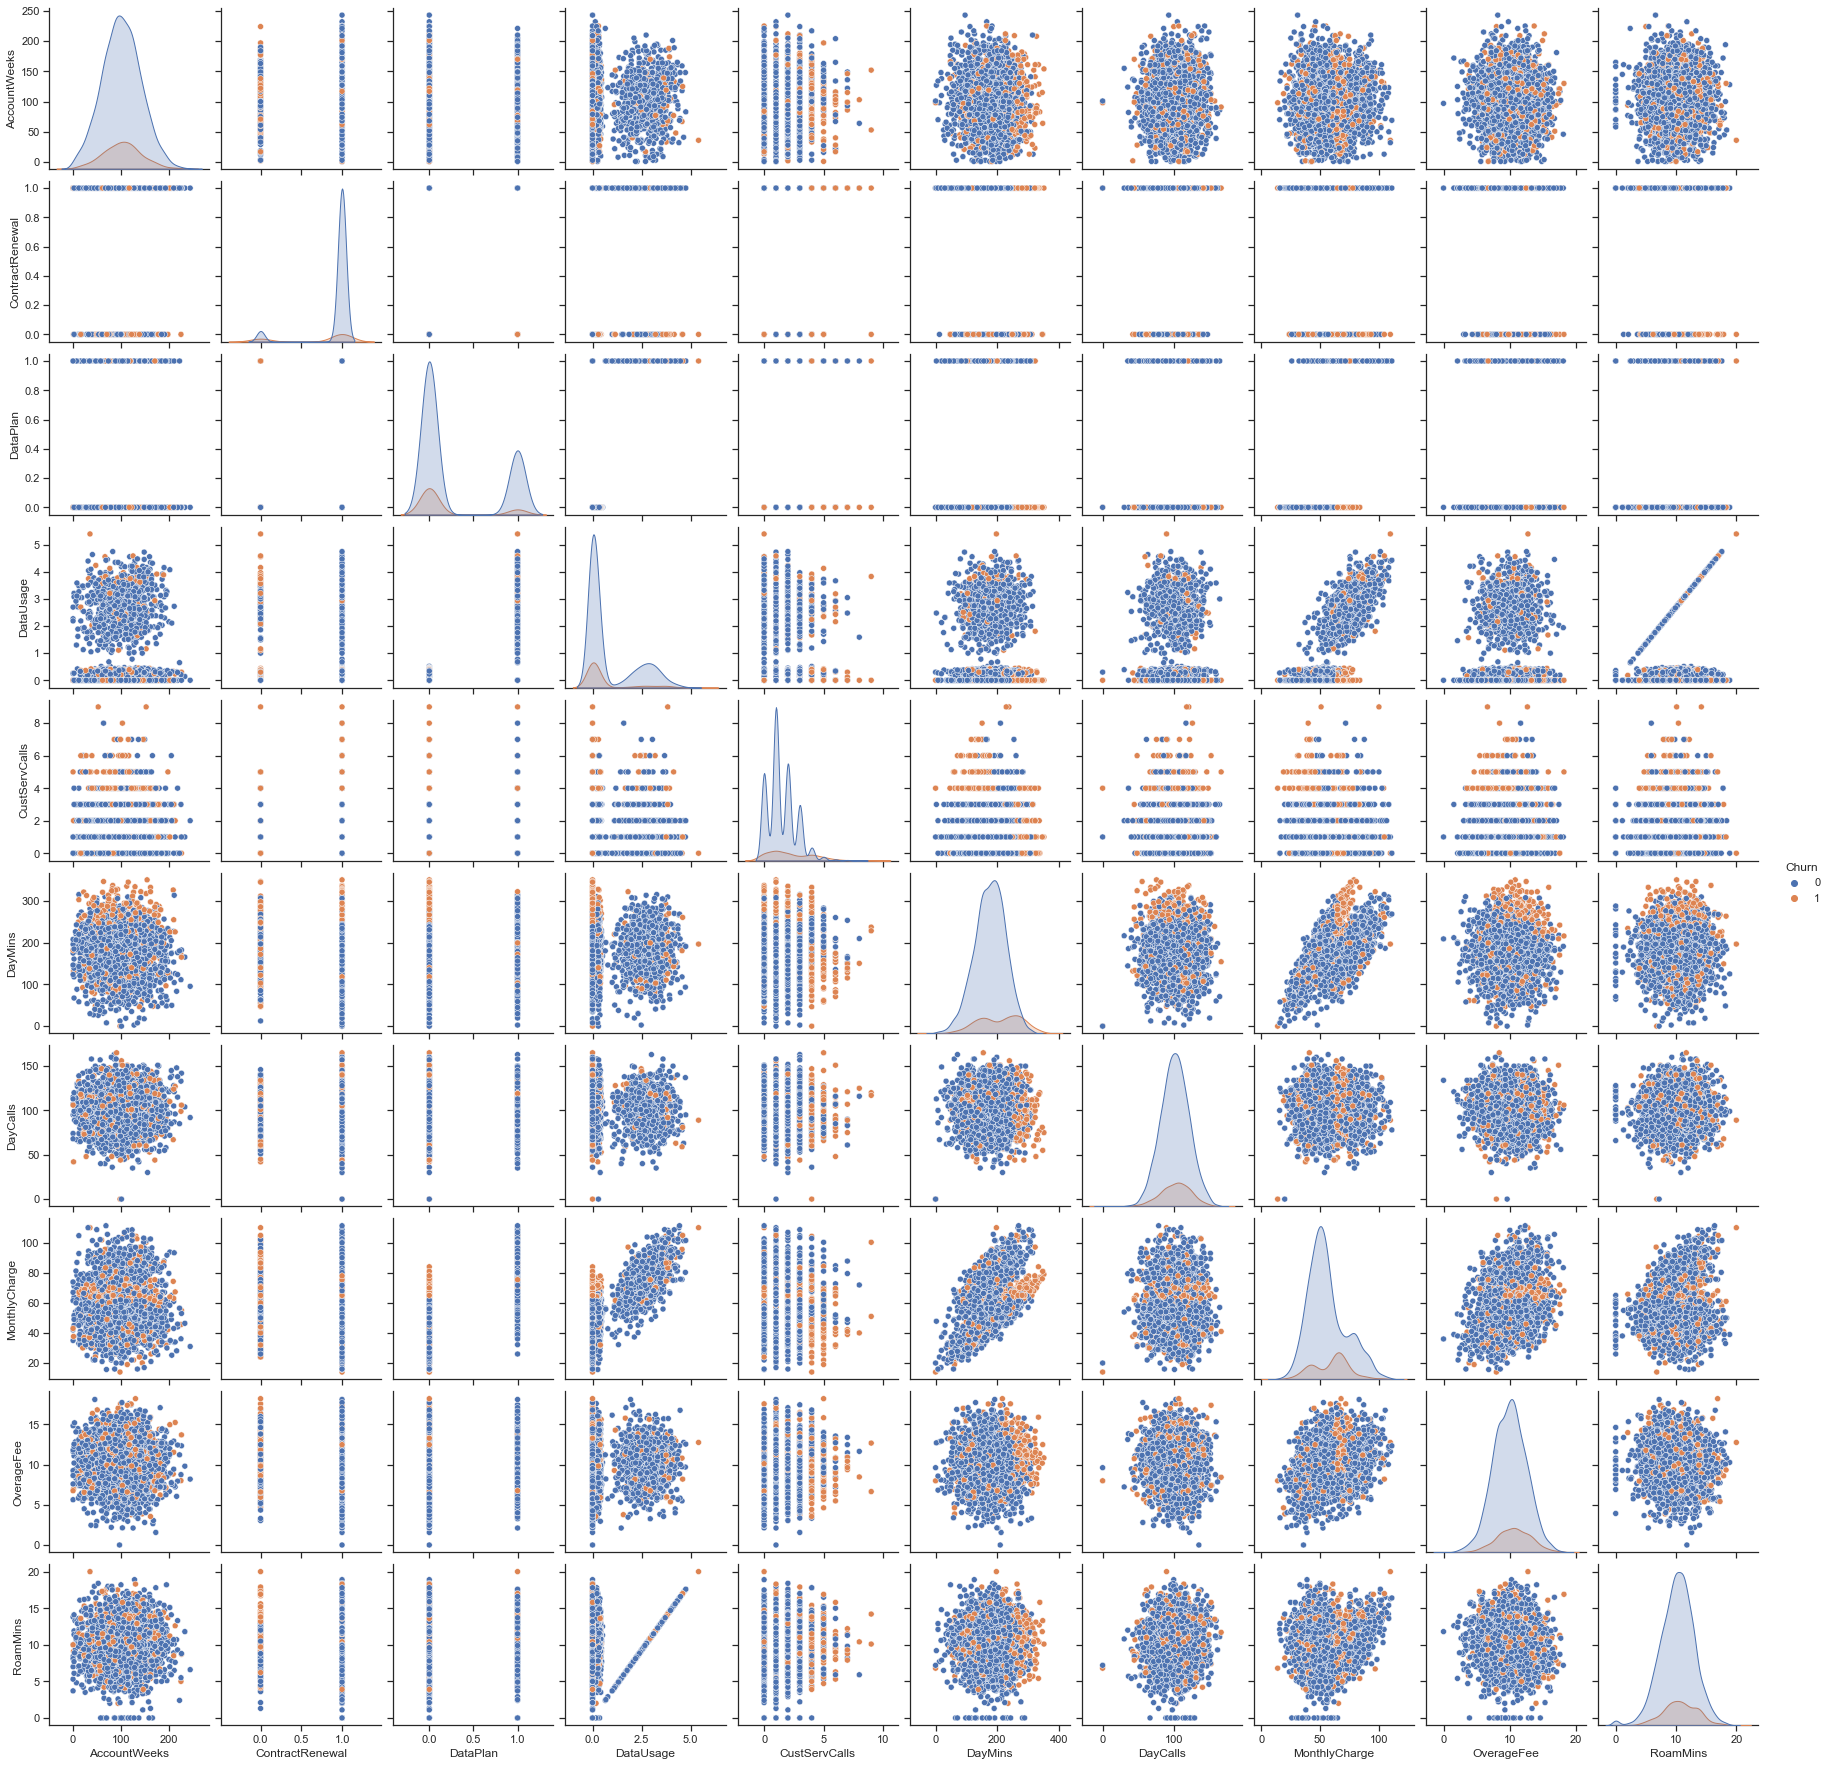

In [14]:
# Visualise the data
import seaborn as sns
sns.set(style = "ticks")
sns.pairplot(data, hue="Churn")

Based on the graphical representation, it seems like a large share of people who churn have high DayMins and a high Overage fee. Thus we multiply the two, while creating a new column call called DayMinsXOverageFee. Note that these people are also more distributed on the right side of DayMins. Fortunately, DayMins has a bigger support which favours the variable.
Following the same logic, we create for more variables multiplying those features that, together, seem to have a postive impact on the churning rate.

In [10]:
data['DayMinsXOverageFee'] = data['DayMins'] * data['OverageFee']
data['CusExp'] = data['CustServCalls'] * data['AccountWeeks']
data['ServiceExposure'] = data['AccountWeeks'] * data['DayMins']
data['DayMinsXAccountWeeks'] = data['DayMins'] * data['AccountWeeks']
data['DayMinsXDayCalls'] = data['DayMins'] * data['DayCalls']
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DayMinsXOverageFee,CusExp,ServiceExposure,DayMinsXAccountWeeks,DayMinsXDayCalls
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00,2616.54,128,33932.80,33932.80,29161.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70,1580.45,107,17291.20,17291.20,19876.80
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20,1475.00,0,33345.80,33345.80,27747.60
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60,928.14,168,25149.60,25149.60,21257.40
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10,1236.91,225,12502.50,12502.50,18837.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90,1683.84,384,29990.40,29990.40,12027.40
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60,1772.54,204,15714.80,15714.80,13172.70
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10,2610.75,56,5062.40,5062.40,19707.20
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00,1706.12,368,39339.20,39339.20,22449.00


In [11]:
# Investigate outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR),(Q3 + 1.5*IQR))

Churn                      0.00
AccountWeeks              -5.50
ContractRenewal            1.00
DataPlan                  -1.50
DataUsage                 -2.67
CustServCalls             -0.50
DayMins                   34.65
DayCalls                  46.50
MonthlyCharge             13.20
OverageFee                 3.17
RoamMins                   3.10
DayMinsXOverageFee      -169.81
CusExp                  -225.00
ServiceExposure        -7380.00
DayMinsXAccountWeeks   -7380.00
DayMinsXDayCalls         -45.00
dtype: float64 Churn                      0.00
AccountWeeks             206.50
ContractRenewal            1.00
DataPlan                   2.50
DataUsage                  4.45
CustServCalls              3.50
DayMins                  325.45
DayCalls                 154.50
MonthlyCharge             98.00
OverageFee                16.93
RoamMins                  17.50
DayMinsXOverageFee      3712.17
CusExp                   503.00
ServiceExposure        42719.20
DayMinsXAccountWeeks   42

# Models

In [12]:
# Bring the data in an appropriate form
X = data.drop('Churn', axis = 1)
y = data['Churn']

# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
# Checking if the test train samples are balanced
print(y_train.mean(), y_test.mean())

0.14599193909538738 0.14272727272727273


### CLASSIFICATION TREE

In [14]:
clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [15]:
clf = clf.fit(X_train, y_train)
predictions_clf = clf.predict(X_test)
predictions_clf


print("Accuracy Score Classification Tree: {:.2f}".format(accuracy_score(y_test, predictions_clf)))
print("Precision Score Classification Tree: {:.2f}".format(precision_score(y_test, predictions_clf)))
print("Recall Score Classification Tree:{:.2f}".format(recall_score(y_test, predictions_clf)))
print("F1 Score Classification Tree: {:.2f}".format(f1_score(y_test, predictions_clf)))

Accuracy Score Classification Tree: 0.88
Precision Score Classification Tree: 0.59
Recall Score Classification Tree:0.63
F1 Score Classification Tree: 0.61


Text(69.0, 0.5, 'True')

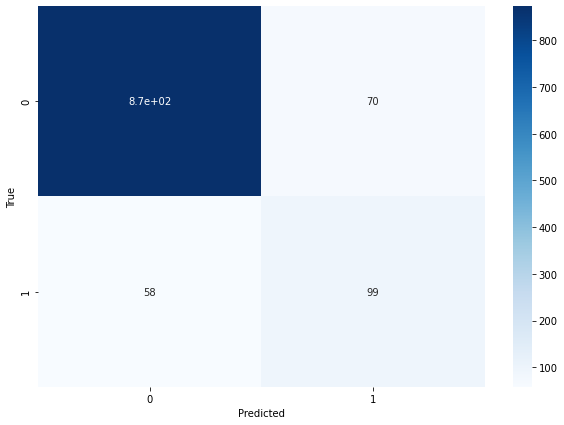

In [16]:
cm1 = confusion_matrix(y_test, predictions_clf, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm1, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

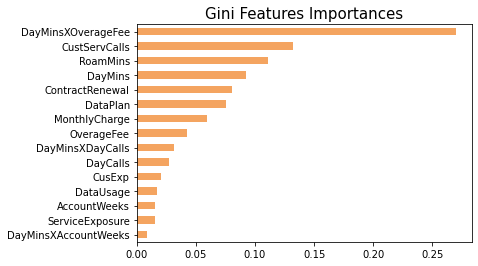

In [17]:
clf.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_clf = pd.Series(data=clf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_clf = importances_clf.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_clf.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

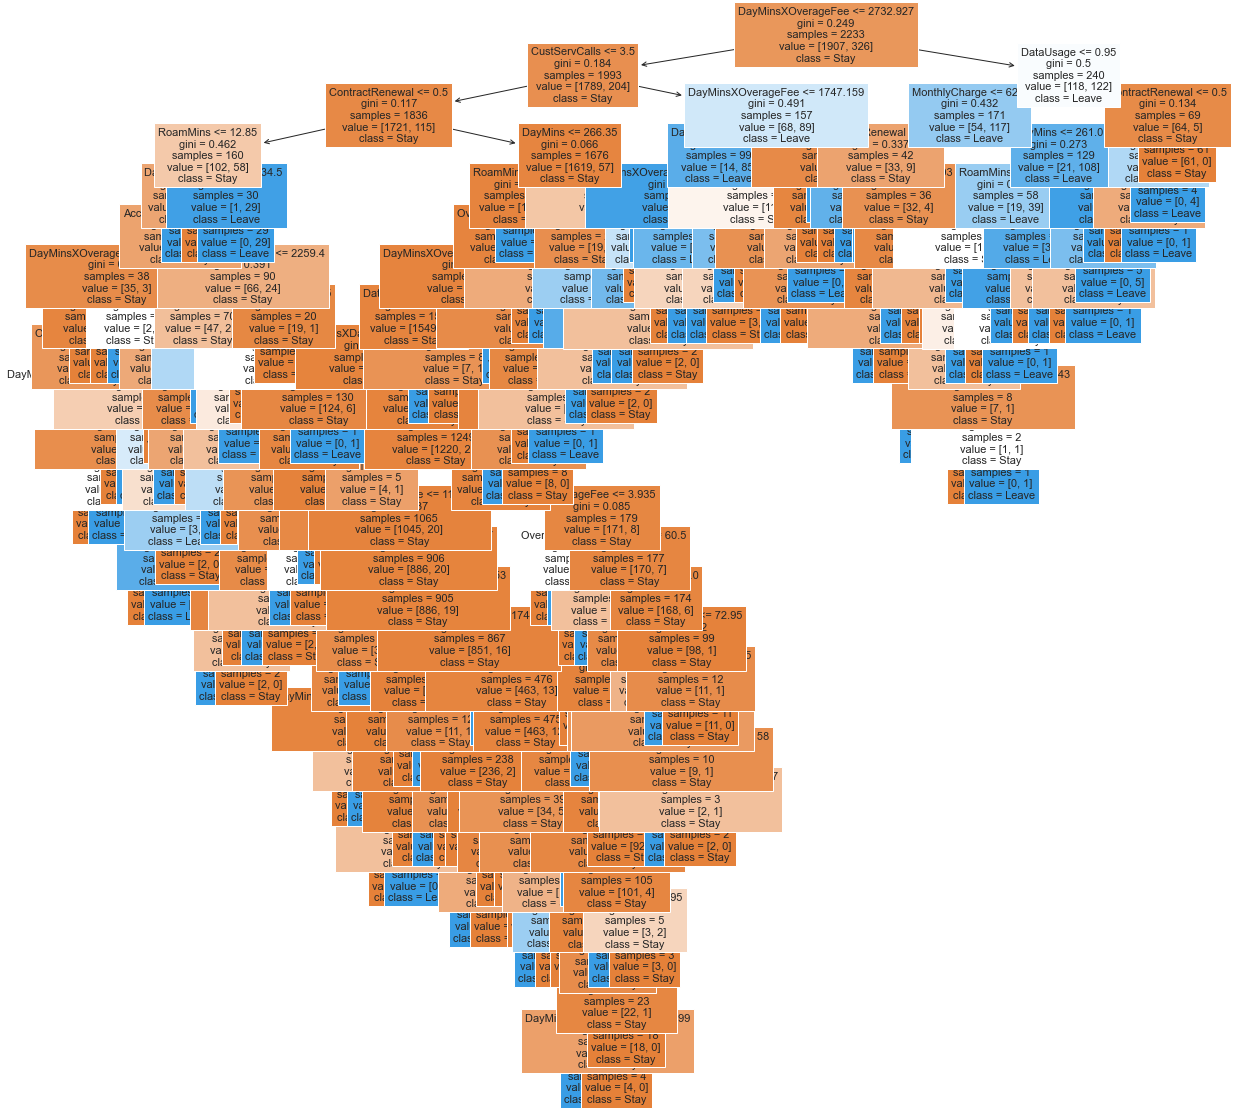

In [23]:
from sklearn import tree
fig1 = plt.figure(figsize=(20,20))
fig1 = tree.plot_tree(clf,
                   feature_names = X.columns,
                   class_names = {0: 'Stay', 1: 'Leave'},
                   filled = True,
                   fontsize = 11
                  )

*Hyperparameter Tunning Classification Tree*

In [18]:
# Write a global function to tune the hyper parapeters of the model

def tuning(model, param):
    rdm_search = RandomizedSearchCV(model, param_distributions=param, n_iter=10, scoring='f1', n_jobs=-1, cv=5, verbose=3, random_state=420)
    rdm_search.fit(X_train, y_train)
    return rdm_search.best_params_

In [19]:
# Finding the best hyperparameters for the classification tree
parameters_tree = {
 "max_depth"        : [4, 5, 6, 7, 8, 9, 10, 11, 12],  
 "criterion"        : ['gini', 'entropy'],
 "max_features"     : [4, 5, 6, 7, 8, 9, 10, 11, 12],
}

tuning(clf, parameters_tree)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_features': 10, 'max_depth': 6, 'criterion': 'gini'}

In [20]:
# Apply best parameters
clf2 = DecisionTreeClassifier(max_features = 10, max_depth = 6, criterion = 'gini')
clf2 = clf2.fit(X_train, y_train)
predictions_clf2 = clf2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_clf2)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_clf2)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_clf2)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_clf2)))

Accuracy Score: 0.92
Precision Score: 0.81
Recall Score: 0.60
F1 Score: 0.69


Text(69.0, 0.5, 'True')

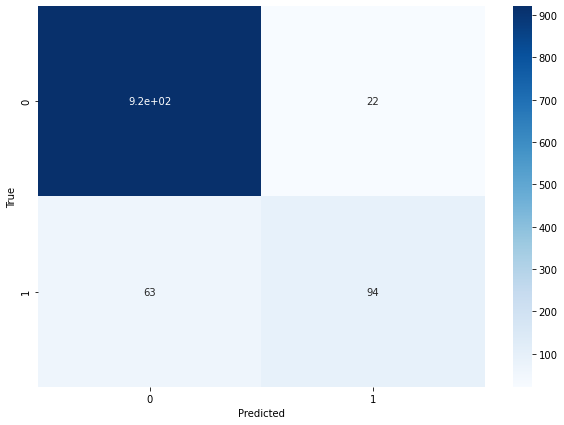

In [21]:
cm_tree = confusion_matrix(y_test, predictions_clf2, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

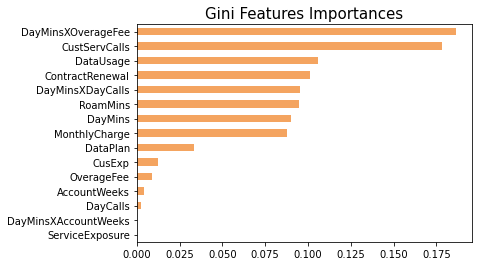

In [22]:
clf2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_clf2 = pd.Series(data=clf2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_clf2 = importances_clf2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_clf2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### RANDOM FOREST

In [23]:
# Create random forest classifer object
rf = RandomForestClassifier(random_state=1)

# Train Random Forest Classifer
rf = rf.fit(X_train, y_train)

#Predict the response for test dataset
predictions_rf = rf.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_rf)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_rf)))
print("Precision Score: {:.2f}".format(recall_score(y_test, predictions_rf)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_rf)))

Accuracy Score: 0.94
Precision Score: 0.89
Precision Score: 0.64
F1 Score: 0.75


Text(69.0, 0.5, 'True')

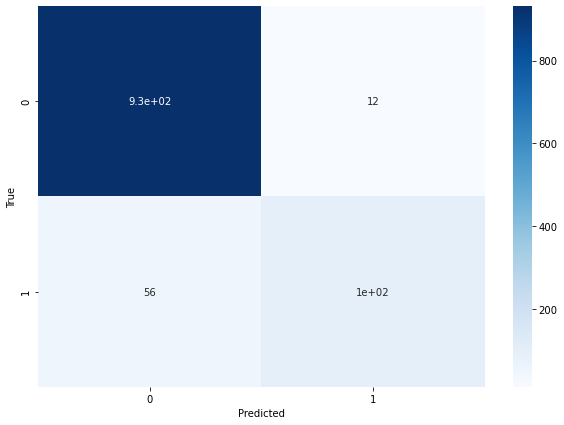

In [24]:
cm2 = confusion_matrix(y_test, predictions_rf, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm2, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

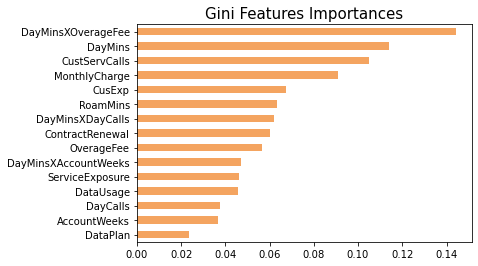

In [25]:
rf.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_rf = pd.Series(data=rf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_rf = importances_rf.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_rf.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

*Hyperparameter Tunning Random Forest*

In [26]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [27]:
parameters_forest = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    "max_features" : ['auto', 'log2', 'sqrt'],
    "min_samples_split" : [2, 4, 6, 8, 10]
}

tuning(rf, parameters_forest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 12,
 'criterion': 'gini'}

In [28]:
rf2 = RandomForestClassifier(random_state=1, min_samples_split=2, max_features='auto', max_depth=12, criterion='gini')
rf2 = rf2.fit(X_train, y_train)
predictions_rf2 = rf2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_rf2)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_rf2)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_rf2)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_rf2)))



Accuracy Score: 0.94
Precision Score: 0.89
Recall Score: 0.64
F1 Score: 0.75


Text(69.0, 0.5, 'True')

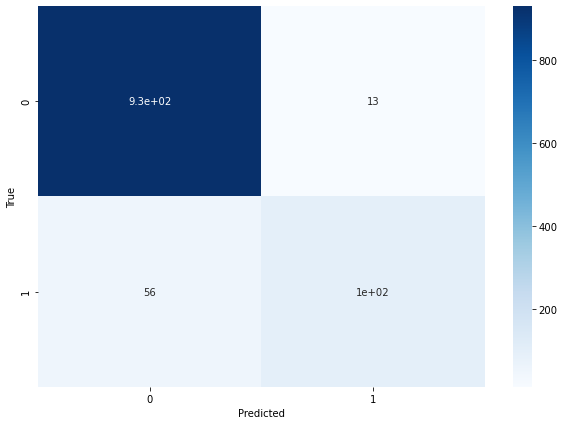

In [29]:
cm_forest = confusion_matrix(y_test, predictions_rf2, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_forest, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

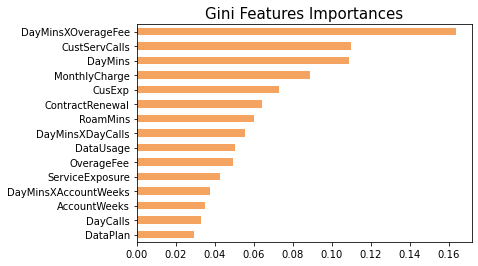

In [30]:
rf2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_rf2 = pd.Series(data=rf2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_rf2 = importances_rf2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_rf2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### ADA BOOST

In [31]:
# Create adaboost classifer object
ada = AdaBoostClassifier()

# Train Adaboost Classifer
model_adaboost = ada.fit(X_train, y_train)

#Predict the response for test dataset
predictions_ada = ada.predict(X_test)
 
# Evaluate acc_test
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_ada)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_ada)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_ada)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_ada)))

Accuracy Score: 0.90
Precision Score: 0.71
Recall Score: 0.49
F1 Score: 0.58


Text(69.0, 0.5, 'True')

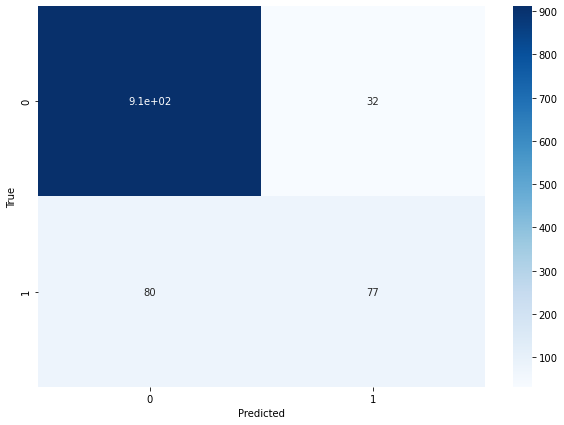

In [32]:
cm3 = confusion_matrix(y_test, predictions_ada, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm3, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

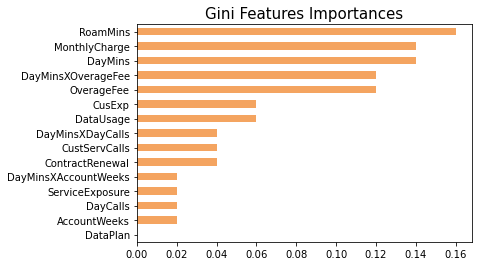

In [33]:
ada.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure', 'DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_ada = pd.Series(data=ada.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_ada = importances_ada.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_ada.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

In [34]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [35]:
parameters_ada = {
    "n_estimators" : [10,20,50,80,100,200, 300,500],
    "learning_rate": [0.8,0.9,1.0, 1.1, 1.2, 1.3, 1.4, 1.5]}

tuning(ada, parameters_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 10, 'learning_rate': 1.5}

In [49]:
ada2 = AdaBoostClassifier(n_estimators=10, learning_rate=1.5)
ada2 = ada2.fit(X_train, y_train)
predictions_ada2 = ada2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_ada)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_ada)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_ada)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_ada)))

Accuracy Score: 0.88
Precision Score: 0.61
Recall Score: 0.49
F1 Score: 0.54


Text(69.0, 0.5, 'True')

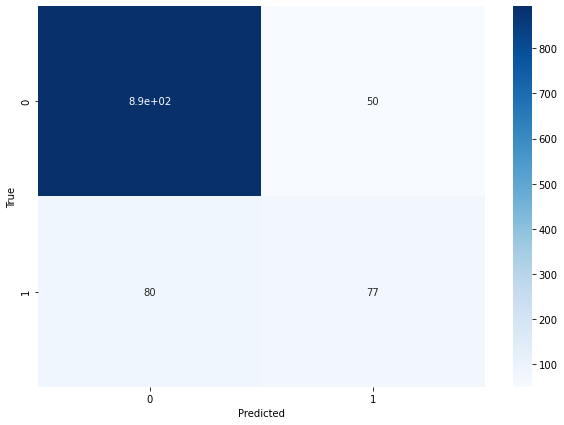

In [37]:
cm_ada = confusion_matrix(y_test, predictions_ada, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_ada, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

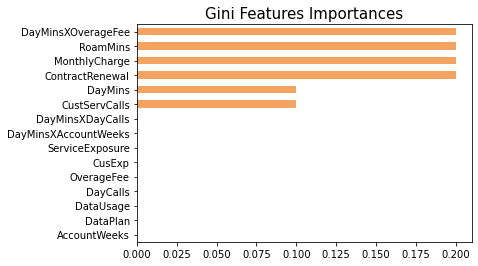

In [38]:
ada2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_ada2 = pd.Series(data=ada2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_ada2 = importances_ada2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_ada2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### XGBoost 

In [39]:
xgb = XGBClassifier(random_state=1)

# Estimate the XGBoost Model
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)

# Get model evaluation
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_xgb)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_xgb)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_xgb)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_xgb)))

Accuracy Score: 0.93
Precision Score: 0.81
Recall Score: 0.67
F1 Score: 0.73


Text(69.0, 0.5, 'True')

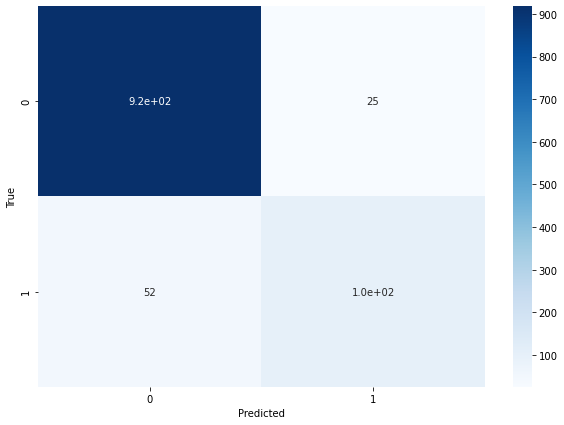

In [40]:
cm4 = confusion_matrix(y_test, predictions_xgb, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm4, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

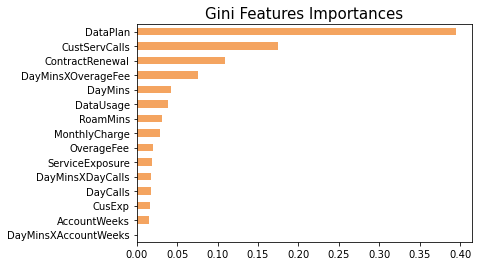

In [41]:
xgb.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_xgb = pd.Series(data=xgb.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_xgb = importances_xgb.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_xgb.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

In [42]:
parameters_xgb = {
 "max_depth"        : [4, 5, 6, 7, 8, 9, 10, 11, 12],  
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25] ,
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

tuning(xgb, parameters_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.7}

In [43]:
# Now we restimate the the xgboost model with the parameters above
xgb2  = XGBClassifier(random_state=1, max_depth=4, learning_rate = 0.05, gamma=0.0, colsample_bytree = 0.7)
xgb2.fit(X_train, y_train)
predictions_xgb2 = xgb2.predict(X_test)

# Get model evaluation
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_xgb2)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_xgb2)))
print("Recall Score: {:.2f}".format(recall_score(y_test, predictions_xgb2)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_xgb2)))

Accuracy Score: 0.94
Precision Score: 0.87
Recall Score: 0.66
F1 Score: 0.75


Text(69.0, 0.5, 'True')

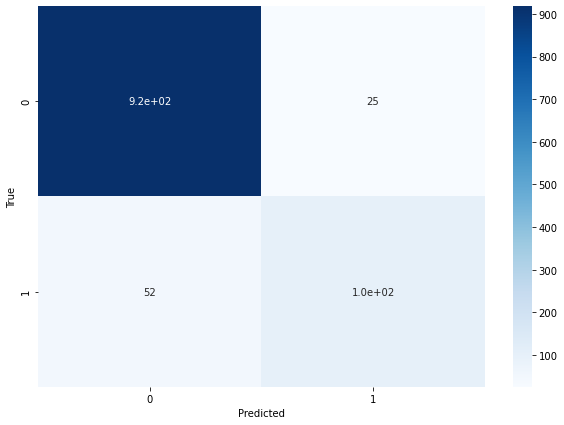

In [44]:
cm_xgb = confusion_matrix(y_test, predictions_xgb, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

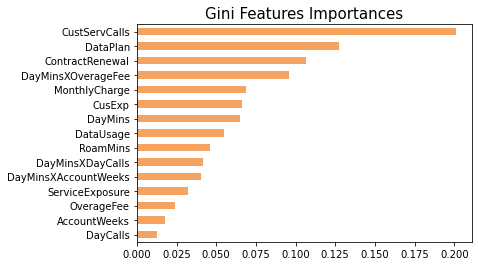

In [45]:
xgb2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure','DayMinsXAccountWeeks','DayMinsXDayCalls']
importances_xgb2 = pd.Series(data=xgb2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_xgb2 = importances_xgb2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_xgb2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

# ROC CURVE

In [48]:
from sklearn import metrics
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [64]:
## Predict probabilities
pred_prob_clf2 = clf2.predict_proba(X_test)[:,1]
pred_prob_rf2 = rf2.predict_proba(X_test)[:,1]
pred_prob_ada2 = ada2.predict_proba(X_test)[:,1]
pred_prob_xgb2 = xgb2.predict_proba(X_test)[:,1]


# roc curve for models
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, pred_prob_clf2, pos_label=1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, pred_prob_rf2, pos_label=1)
fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, pred_prob_ada2, pos_label=1)
fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, pred_prob_xgb2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_clf = roc_auc_score(y_test, pred_prob_clf2)
auc_rf = roc_auc_score(y_test, pred_prob_rf2)
auc_ada = roc_auc_score(y_test, pred_prob_ada2)
auc_xgb = roc_auc_score(y_test, pred_prob_xgb2)

print("Auc for Classification Tree is {}". format(auc_clf))
print("Auc for RF is {}". format(auc_rf))
print("Auc for Ada is {}". format(auc_ada))
print("Auc for Xgboost is {}". format(auc_xgb))

Auc for Classification Tree is 0.8450331304753093
Auc for RF is 0.8952252939865317
Auc for Ada is 0.8391905492026396
Auc for Xgboost is 0.8977345644406319


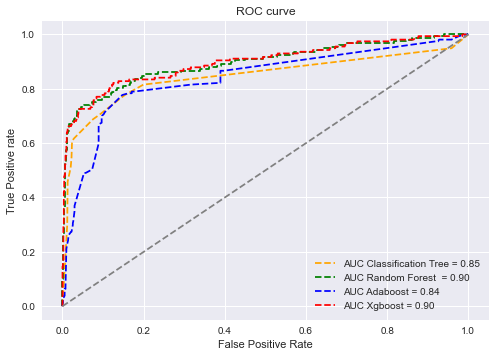

In [66]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AUC Classification Tree = {:.2f}'.format(auc_clf))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AUC Random Forest  = {:.2f}'.format(auc_rf))
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='AUC Adaboost = {:.2f}'.format(auc_ada))
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='AUC Xgboost = {:.2f}'.format(auc_xgb))
plt.plot(p_fpr, p_tpr, linestyle='--', color='grey')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')